## Importing necessary libraries

In [1]:
# Data manipulation and handling libraries
import numpy as np
import pandas as pd

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sci

# Data preprocessing and EDA libraries
from collections import OrderedDict
from sklearn.preprocessing import StandardScaler

#Warnings filter liabrary
import warnings
warnings.filterwarnings('ignore')

### Loading the dataframe

In [2]:
df_train = pd.read_excel('Consumer creditworthiness train data.xlsx')
test = pd.read_excel('Consumer creditworthiness test data.xlsx')

In [3]:
df_test= test.tail(10)

In [4]:
df_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
83,862622.0,Female,Yes,1.0,Graduate,No,2700000.0,0.0,992000.0,360.0,1.0,Semiurban
84,822173.0,Male,Yes,0.0,Not Graduate,No,540000.0,855000.0,0.0,180.0,1.0,Urban
85,858831.0,Male,Yes,1.0,Graduate,No,765000.0,562500.0,346000.0,360.0,1.0,Semiurban
86,151918.0,Male,Yes,2.0,Not Graduate,No,897075.0,317475.0,314000.0,360.0,1.0,Rural
87,994900.0,Male,Yes,0.0,Graduate,No,727200.0,438750.0,216000.0,360.0,1.0,Rural
88,745846.0,Female,No,0.0,Graduate,No,652500.0,0.0,142000.0,360.0,1.0,Rural
89,632570.0,Male,Yes,3+,Graduate,No,923850.0,0.0,80000.0,180.0,1.0,Rural
90,320705.0,Male,Yes,1.0,Graduate,No,1816200.0,54000.0,506000.0,360.0,1.0,Urban
91,333950.0,Male,Yes,2.0,Graduate,No,1706175.0,0.0,374000.0,360.0,1.0,Urban
92,458928.0,Female,No,0.0,Graduate,Yes,1031175.0,0.0,266000.0,360.0,0.0,Semiurban


In [5]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,294853.0,Male,No,0.0,Graduate,No,1316025.0,0.0,NaN,360.0,1.0,Urban,Y
1,162883.0,Male,Yes,1.0,Graduate,No,1031175.0,339300.0,256000.0,360.0,1.0,Rural,N
2,620668.0,Male,Yes,0.0,Graduate,Yes,675000.0,0.0,132000.0,360.0,1.0,Urban,Y
3,295747.0,Male,Yes,0.0,Not Graduate,No,581175.0,530550.0,240000.0,360.0,1.0,Urban,Y
4,133390.0,Male,No,0.0,Graduate,No,1350000.0,0.0,282000.0,360.0,1.0,Urban,Y


### Exploratory Data Analysis

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            521 non-null    float64
 1   Gender             511 non-null    object 
 2   Married            518 non-null    object 
 3   Dependents         508 non-null    object 
 4   Education          521 non-null    object 
 5   Self_Employed      494 non-null    object 
 6   ApplicantIncome    521 non-null    float64
 7   CoapplicantIncome  521 non-null    float64
 8   LoanAmount         520 non-null    float64
 9   Loan_Amount_Term   507 non-null    float64
 10  Credit_History     478 non-null    float64
 11  Property_Area      521 non-null    object 
 12  Loan_Status        521 non-null    object 
dtypes: float64(6), object(7)
memory usage: 53.0+ KB


In [7]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,294853.0,Male,No,0.0,Graduate,No,1316025.0,0.0,NaN,360.0,1.0,Urban,Y
1,162883.0,Male,Yes,1.0,Graduate,No,1031175.0,339300.0,256000.0,360.0,1.0,Rural,N
2,620668.0,Male,Yes,0.0,Graduate,Yes,675000.0,0.0,132000.0,360.0,1.0,Urban,Y
3,295747.0,Male,Yes,0.0,Not Graduate,No,581175.0,530550.0,240000.0,360.0,1.0,Urban,Y
4,133390.0,Male,No,0.0,Graduate,No,1350000.0,0.0,282000.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,947032.0,Female,Yes,2.0,Graduate,No,456975.0,367200.0,226000.0,480.0,1.0,Semiurban,Y
517,756833.0,Male,Yes,NaN,Not Graduate,No,691650.0,405000.0,246000.0,360.0,0.0,Semiurban,N
518,395763.0,Male,No,0.0,Graduate,No,1053675.0,430875.0,370000.0,360.0,1.0,Semiurban,N
519,158946.0,Female,No,0.0,Not Graduate,No,765000.0,0.0,190000.0,360.0,1.0,Rural,N


In [8]:
df= pd.concat([df_train,df_test])

In [9]:
df.isnull().sum()

Loan_ID               0
Gender               10
Married               3
Dependents           13
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            1
Loan_Amount_Term     14
Credit_History       43
Property_Area         0
Loan_Status          10
dtype: int64

Observation:
There are some null values in Gender, dependents, Self_Employed, Loan_Amount_Term and credit-history.

### Filling Null Values

In [10]:
#fill missing categorical values with mode

categegorical_columns = ['Gender', 'Married', 'Dependents', 'Self_Employed','Credit_History','Loan_Amount_Term']
for col in categegorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])
    
#fill missing numerical values with median

numerical_columns = ['LoanAmount']
for col in numerical_columns:
    df[col]=df[col].fillna(df[col].median())

In [11]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status          10
dtype: int64

Missing values are imputed successfully.

In [12]:
df.describe()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,531.000000,5.310000e+02,5.310000e+02,5.310000e+02,531.000000,531.000000
mean,548849.766478,1.228399e+06,3.472110e+05,2.805311e+05,343.344633,0.860640
std,261689.897482,1.438804e+06,4.798371e+05,1.735528e+05,63.047331,0.346648
min,101559.000000,3.375000e+04,0.000000e+00,0.000000e+00,12.000000,0.000000
25%,317696.000000,6.477750e+05,0.000000e+00,1.950000e+05,360.000000,1.000000
50%,546000.000000,8.586000e+05,2.765250e+05,2.500000e+05,360.000000,1.000000
75%,789552.000000,1.292850e+06,5.158125e+05,3.200000e+05,360.000000,1.000000
max,998791.000000,1.822500e+07,4.500000e+06,1.400000e+06,480.000000,1.000000


Analysis from Descriptive Statistics

1. There might be skewness in all the columns.
2. There might be chance of outliers if we compare quartile of some columns.
3. Since min of Coapplicantincome and Loanamount are zero, outliers are not present towards lower whisker region.

In [13]:
df.drop("Loan_ID",axis=1,inplace=True) # since it has all unique ID's

### Performing outlier treatment

In [14]:
col_sel=['ApplicantIncome','CoapplicantIncome','LoanAmount']
def replace_outlier(my_df, cols):
    
    for col in cols: 
        q1 = my_df[col].quantile(0.25)
        q3 = my_df[col].quantile(0.75)
        iqr = q3 - q1
        upper_whisker = q3 + (1.5*iqr)
        lower_whisker = q1 - (1.5*iqr)
        
        my_df[col] = np.where(my_df[col]>upper_whisker, upper_whisker,
                           np.where(my_df[col]<lower_whisker, lower_whisker, my_df[col]))
replace_outlier(df, col_sel)

In [15]:
replace_outlier(df, col_sel)

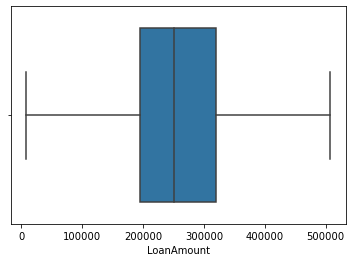

In [16]:
sns.boxplot(df.LoanAmount)
plt.show()

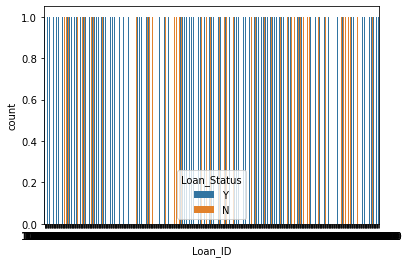

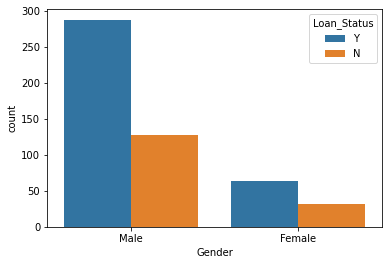

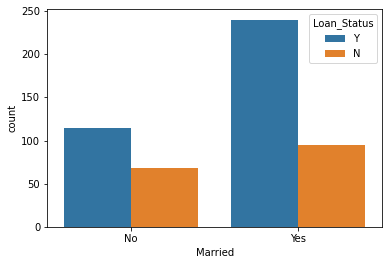

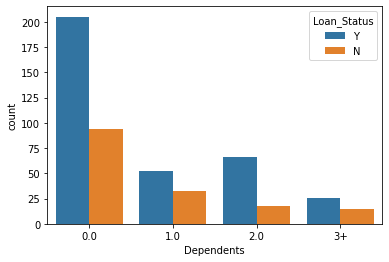

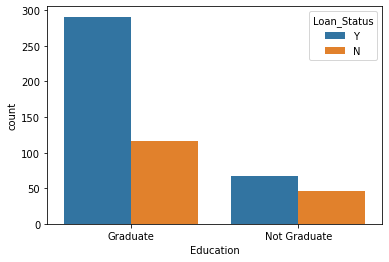

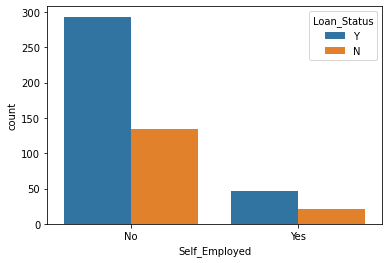

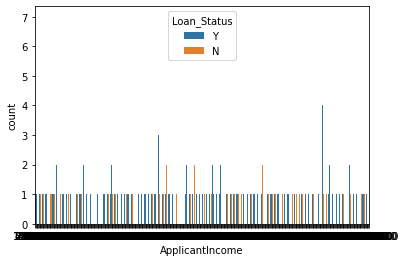

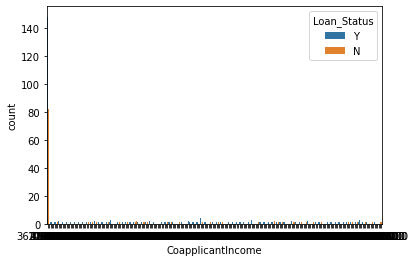

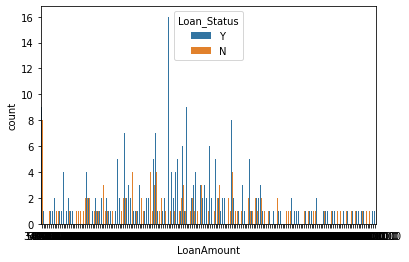

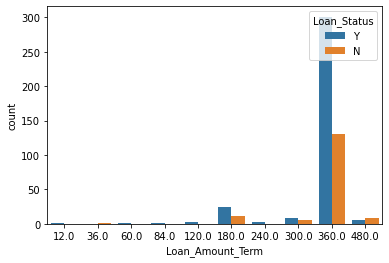

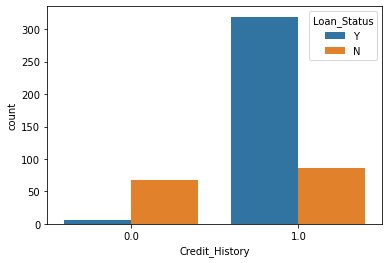

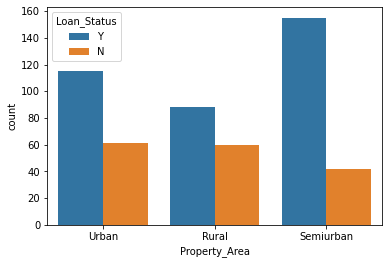

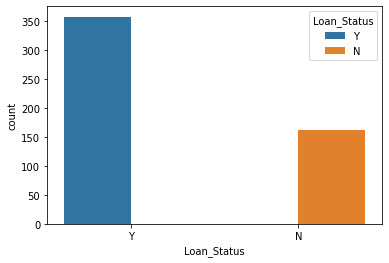

In [17]:
for col in (df_train.columns):
    plt.figure()
    sns.countplot(df_train[col], hue= df_train["Loan_Status"])
plt.show()

### Label encoding

In [18]:
df.replace({'Loan_Status':{'N':0,'Y':1},'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                  'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [19]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,1,0,1316025.0,0.0,250000.0,360.0,1.0,2,1.0
1,1,1,1.0,1,0,1031175.0,339300.0,256000.0,360.0,1.0,0,0.0
2,1,1,0.0,1,1,675000.0,0.0,132000.0,360.0,1.0,2,1.0
3,1,1,0.0,0,0,581175.0,530550.0,240000.0,360.0,1.0,2,1.0
4,1,0,0.0,1,0,1350000.0,0.0,282000.0,360.0,1.0,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
88,0,0,0.0,1,0,652500.0,0.0,142000.0,360.0,1.0,0,NaN
89,1,1,3+,1,0,923850.0,0.0,80000.0,180.0,1.0,0,NaN
90,1,1,1.0,1,0,1816200.0,54000.0,506000.0,360.0,1.0,2,NaN
91,1,1,2.0,1,0,1706175.0,0.0,374000.0,360.0,1.0,2,NaN


In [20]:
# replacing the value of 3+ to 4
df_new = df.replace(to_replace='3+', value=4)

In [21]:
new_train = df_new.iloc[:521]
new_test = df_new.iloc[521:]

### Multivariate Analysis using Regression

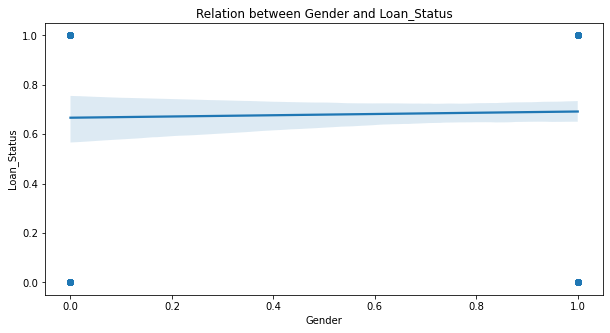

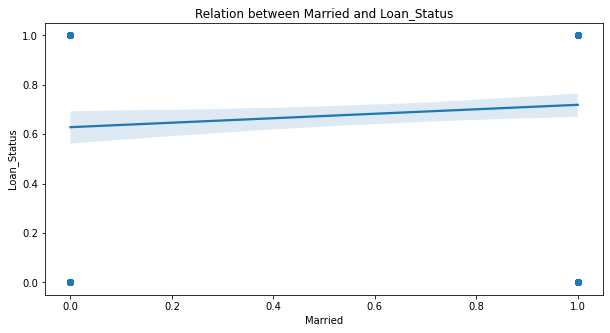

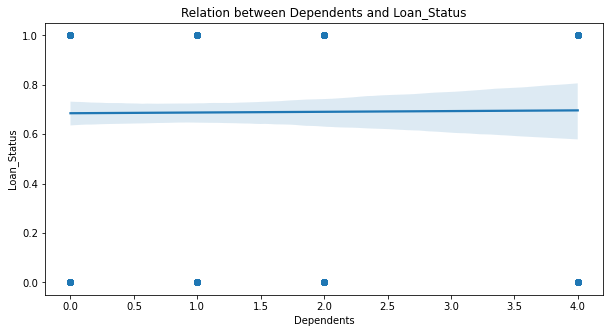

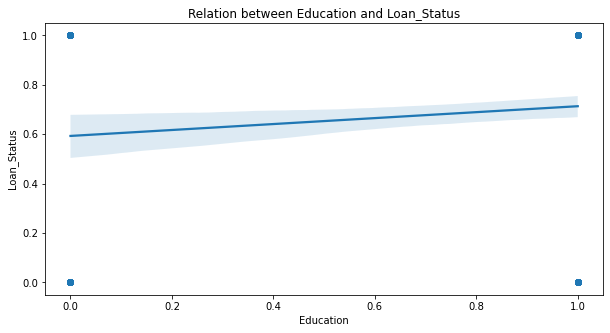

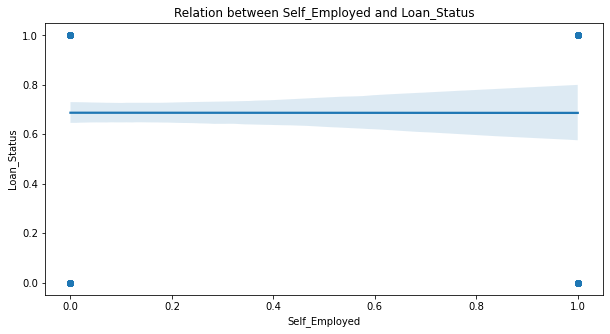

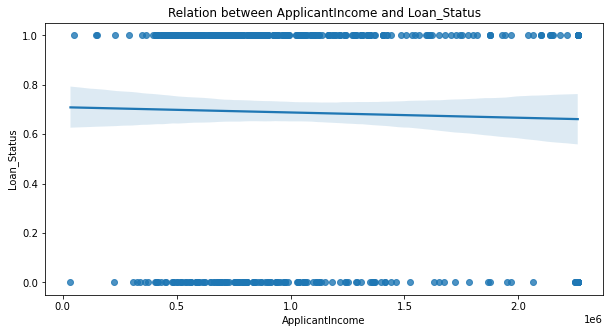

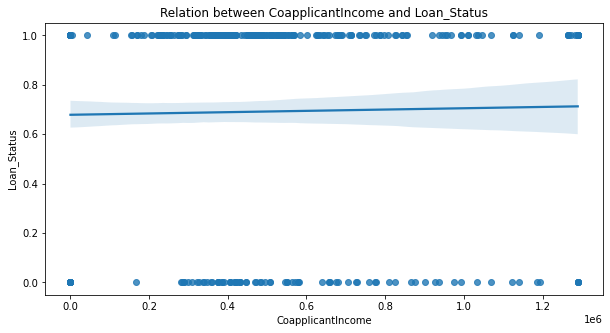

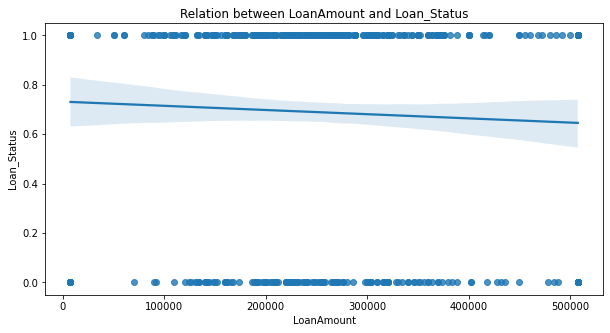

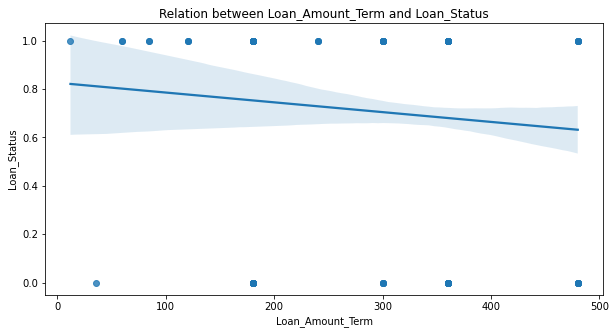

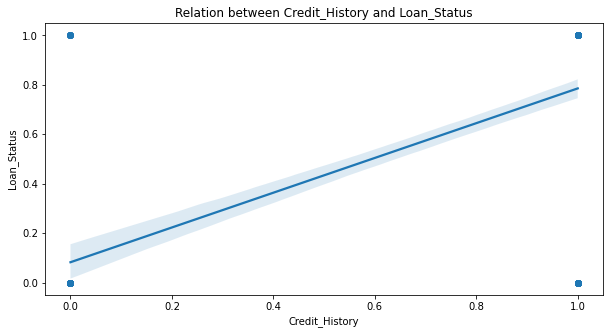

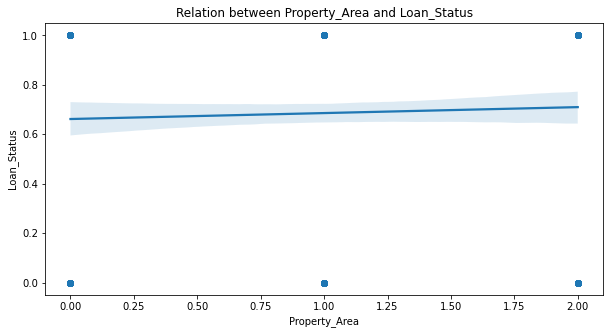

In [22]:
for col in new_train.columns:
    if col != "Loan_Status":
        fig,ax1 = plt.subplots(figsize = (10,5)) # Give any size
        sns.regplot(x = new_train[col], y = new_train["Loan_Status"],ax=ax1).set_title(f'Relation between {col} and Loan_Status')

### Multi collinearity
1. correlation matrix / heat map (stage 1)

<AxesSubplot:>

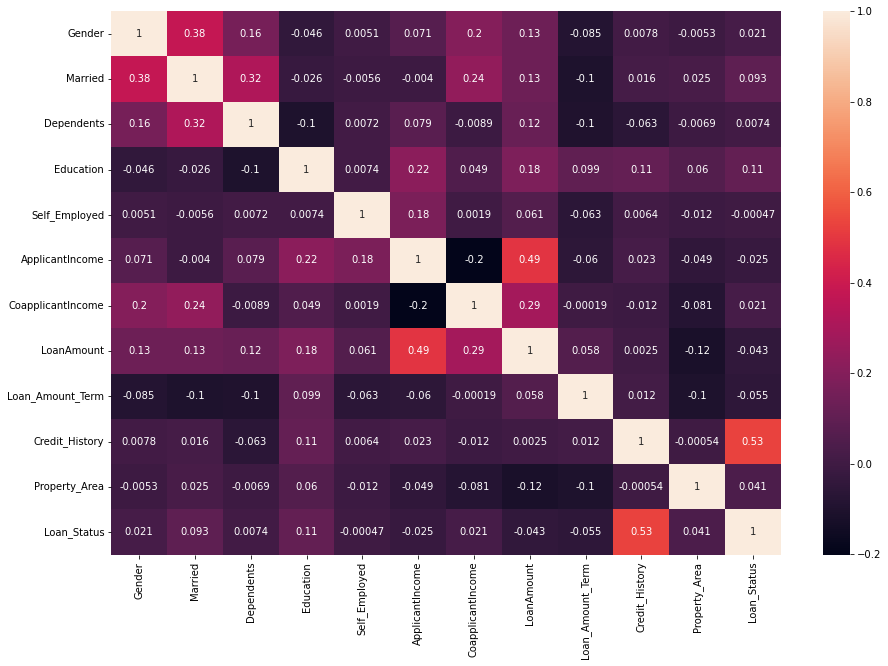

In [23]:
corr = new_train.corr()
df_new.ax = plt.subplots(figsize =(15,10))
sns.heatmap(corr, annot = True)

Analysis from correllation plot
1. Here we see that ApplicantIncome and LoanAmount have high colinearity.
2. Also credit history seems to be highly correlated with loan status, this points to it being the most important feature for our model.

In [24]:
#sns.pairplot(data= new_train, hue= "Loan_Status")
#plt.show()

#### correlation with target feature

In [25]:
def correlation_with_target(data,t_col):
    independent_variable = data.drop(t_col,axis=1).columns
    corr_result = []
    for col in independent_variable:
        corr_result.append(data[t_col].corr(data[col]))
    result = pd.DataFrame([independent_variable,corr_result],index=['Independent variables','Correlation']).T
    return result.sort_values('Correlation',ascending = False)

In [26]:
correlation_with_target(new_train,'Loan_Status')

,Independent variables,Correlation
9,Credit_History,0.526675
3,Education,0.106943
1,Married,0.093195
10,Property_Area,0.040831
0,Gender,0.020986
6,CoapplicantIncome,0.020957
2,Dependents,0.007448
4,Self_Employed,-0.000475
5,ApplicantIncome,-0.02543
7,LoanAmount,-0.042641


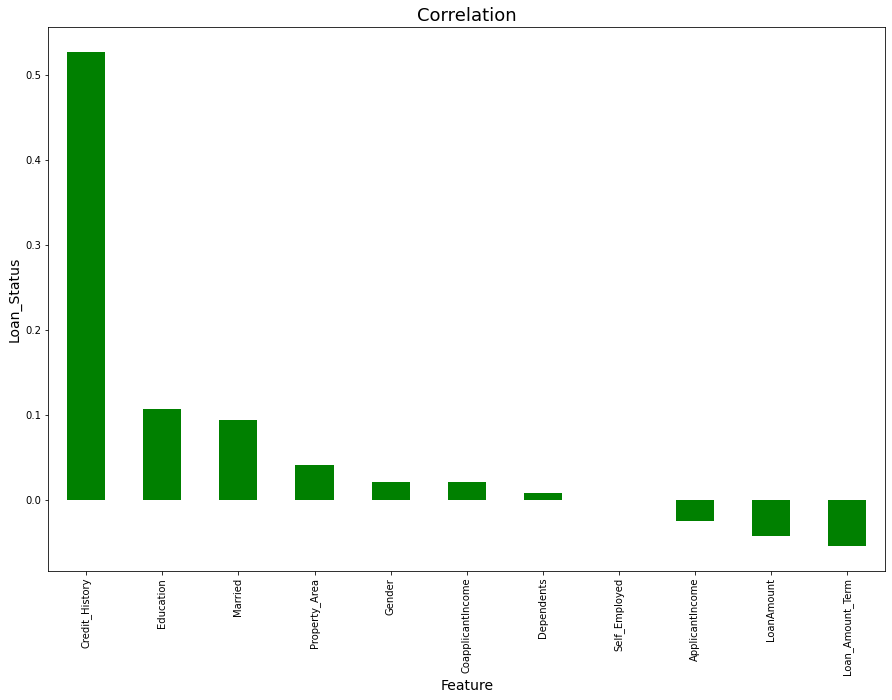

In [27]:
plt.figure(figsize=(15,10))
new_train.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar', color='g')
plt.xlabel("Feature",fontsize=14)
plt.ylabel("Loan_Status",fontsize=14)
plt.title("Correlation",fontsize=18)
plt.show()

Analysis from Correlation graph:
1. Credit_History has more correlation than any other feature.
2. Education , Married and Property_Area has positive correlation.
3. Loan_Amount_Term is more negatively correlated.
4. Dependents and Self_Employed has very low correlation.

### Bi-Variate Analysis

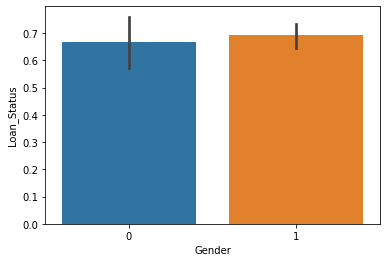

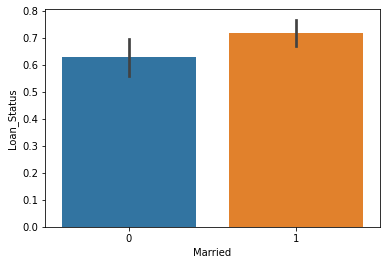

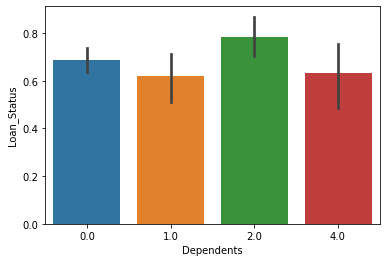

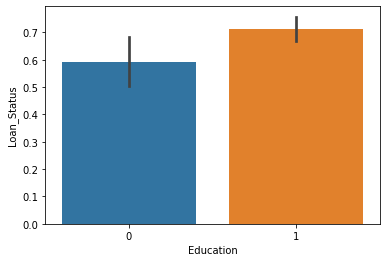

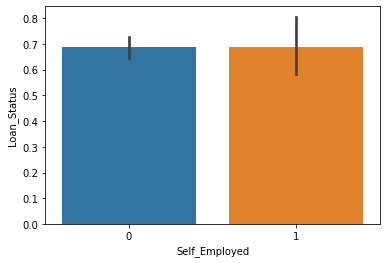

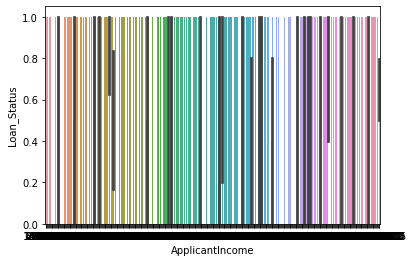

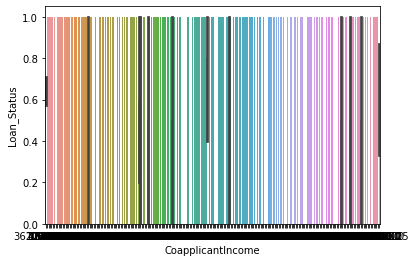

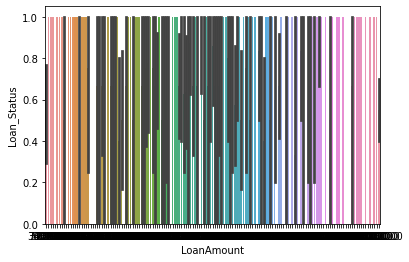

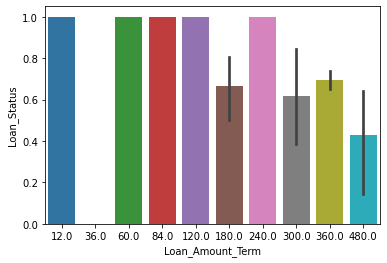

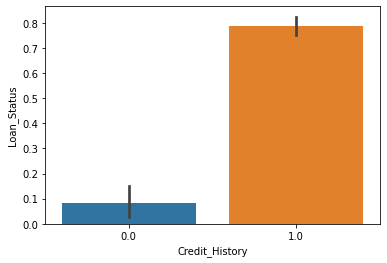

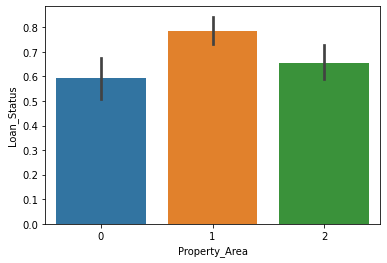

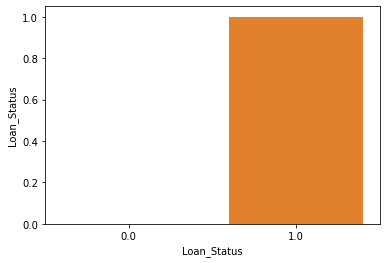

In [28]:
from numpy import mean
for col in (new_train.columns):
    plt.figure()
    sns.barplot(x=col, y="Loan_Status",data=new_train,estimator = mean )
plt.show()

### Data Preparation

In [29]:
# split into X and y
X = new_train.drop('Loan_Status', axis = 1)
y = new_train['Loan_Status']

## Feature Engineering 

1. Features like LoanAmount_per_term & IncomeAmount_per_term are created for better understanding of the consumer.
2. LoanAmount_per_term = Loan Amount/Loan_Amount_term
3. RatioIncomeAmount_per_term = IncomeAmount / Loan_Amount_term
4. If the LoanAmount_per_term is greater than IncomeAmount_per_term,consumer may face problem in repaying the Loan back in time.

In [30]:
df_new['LoanAmount_per_term'] = df_new.LoanAmount/df_new.Loan_Amount_Term
df_new['RatioIncomeAmount_per_term'] = df_new.ApplicantIncome/df_new.LoanAmount_per_term

In [31]:
df_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_per_term,RatioIncomeAmount_per_term
0,1,0,0.0,1,0,1316025.0,0.0,250000.0,360.0,1.0,2,1.0,694.444444,1895.076000
1,1,1,1.0,1,0,1031175.0,339300.0,256000.0,360.0,1.0,0,0.0,711.111111,1450.089844
2,1,1,0.0,1,1,675000.0,0.0,132000.0,360.0,1.0,2,1.0,366.666667,1840.909091
3,1,1,0.0,0,0,581175.0,530550.0,240000.0,360.0,1.0,2,1.0,666.666667,871.762500
4,1,0,0.0,1,0,1350000.0,0.0,282000.0,360.0,1.0,2,1.0,783.333333,1723.404255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0,0,0.0,1,0,652500.0,0.0,142000.0,360.0,1.0,0,NaN,394.444444,1654.225352
89,1,1,4.0,1,0,923850.0,0.0,80000.0,180.0,1.0,0,NaN,444.444444,2078.662500
90,1,1,1.0,1,0,1816200.0,54000.0,506000.0,360.0,1.0,2,NaN,1405.555556,1292.158103
91,1,1,2.0,1,0,1706175.0,0.0,374000.0,360.0,1.0,2,NaN,1038.888889,1642.307487


In [32]:
new_train = df_new.iloc[:521]
new_test = df_new.iloc[521:]

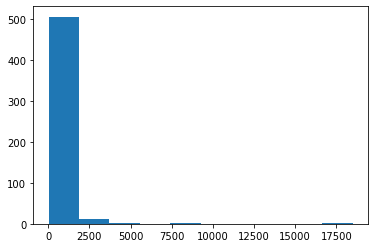

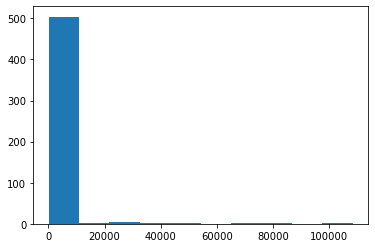

In [33]:
for col in ['LoanAmount_per_term', 'RatioIncomeAmount_per_term']:
    plt.hist(new_train[col])
    plt.show()

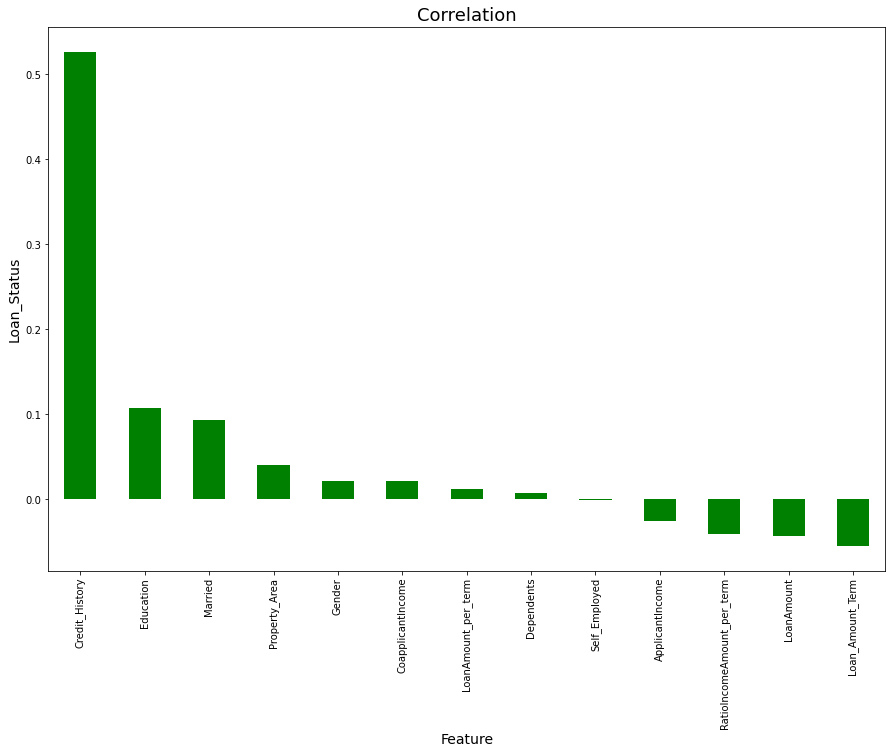

In [34]:
plt.figure(figsize=(15,10))
new_train.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar', color='g')
plt.xlabel("Feature",fontsize=14)
plt.ylabel("Loan_Status",fontsize=14)
plt.title("Correlation",fontsize=18)
plt.show()

Here it is observed that RatioIncomeAmount per term and LoanAmount per term are negatively correlated to Loan_Status.


In [35]:
def correlation_with_target(data,t_col):
    independent_variable = data.drop(t_col,axis=1).columns
    corr_result = []
    for col in independent_variable:
        corr_result.append(data[t_col].corr(data[col]))
    result = pd.DataFrame([independent_variable,corr_result],index=['Independent variables','Correlation']).T
    return result.sort_values('Correlation',ascending = False)

In [36]:
correlation_with_target(new_train,'Loan_Status')

,Independent variables,Correlation
9,Credit_History,0.526675
3,Education,0.106943
1,Married,0.093195
10,Property_Area,0.040831
0,Gender,0.020986
6,CoapplicantIncome,0.020957
11,LoanAmount_per_term,0.01213
2,Dependents,0.007448
4,Self_Employed,-0.000475
5,ApplicantIncome,-0.02543


### Multi collinearity test

1. Variance Inflation Factor.
2. Let's check multicollinearity,
to calculated VIF we can use the loop

In [37]:

Default_indep=X
VIF=[]

import statsmodels.api as sm
features=list(Default_indep.columns)
for i in range(1, len(Default_indep.columns)):
    x=Default_indep.loc[:,Default_indep.columns!=features[i]]
    y=Default_indep.loc[:,Default_indep.columns==features[i]]
    model=sm.OLS(y,x)
    results=model.fit()

    rsq=results.rsquared
    vif=round(1/(1-rsq),2)
    print ("R-Sqr value of {} is {}".format(features[i],rsq))
    print ('VIF for {} is {}'.format(features[i],vif))
    VIF.append(vif)

R-Sqr value of Married is 0.7331545778662334
VIF for Married is 3.75
R-Sqr value of Dependents is 0.4010620174181624
VIF for Dependents is 1.67
R-Sqr value of Education is 0.8053125739960665
VIF for Education is 5.14
R-Sqr value of Self_Employed is 0.15995264755458727
VIF for Self_Employed is 1.19
R-Sqr value of ApplicantIncome is 0.8666293216211548
VIF for ApplicantIncome is 7.5
R-Sqr value of CoapplicantIncome is 0.6031686278578479
VIF for CoapplicantIncome is 2.52
R-Sqr value of LoanAmount is 0.9043279098107626
VIF for LoanAmount is 10.45
R-Sqr value of Loan_Amount_Term is 0.9185920170839309
VIF for Loan_Amount_Term is 12.28
R-Sqr value of Credit_History is 0.8473986696187433
VIF for Credit_History is 6.55
R-Sqr value of Property_Area is 0.6256907878787648
VIF for Property_Area is 2.67


Even though the VIF for Dependents, Self_Employed is less due to less available data no feature is dropped.

In [38]:
from sklearn.feature_selection import VarianceThreshold

varselector= VarianceThreshold(threshold=0)
varselector.fit_transform(new_train)
# Get columns to keep and create new dataframe with those only
cols = varselector.get_support(indices=True)
df_final = df_new.iloc[:,cols]

In [39]:
df_final

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_per_term,RatioIncomeAmount_per_term
0,1,0,0.0,1,0,1316025.0,0.0,250000.0,360.0,1.0,2,1.0,694.444444,1895.076000
1,1,1,1.0,1,0,1031175.0,339300.0,256000.0,360.0,1.0,0,0.0,711.111111,1450.089844
2,1,1,0.0,1,1,675000.0,0.0,132000.0,360.0,1.0,2,1.0,366.666667,1840.909091
3,1,1,0.0,0,0,581175.0,530550.0,240000.0,360.0,1.0,2,1.0,666.666667,871.762500
4,1,0,0.0,1,0,1350000.0,0.0,282000.0,360.0,1.0,2,1.0,783.333333,1723.404255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0,0,0.0,1,0,652500.0,0.0,142000.0,360.0,1.0,0,NaN,394.444444,1654.225352
89,1,1,4.0,1,0,923850.0,0.0,80000.0,180.0,1.0,0,NaN,444.444444,2078.662500
90,1,1,1.0,1,0,1816200.0,54000.0,506000.0,360.0,1.0,2,NaN,1405.555556,1292.158103
91,1,1,2.0,1,0,1706175.0,0.0,374000.0,360.0,1.0,2,NaN,1038.888889,1642.307487


### Skewed Distribution Treatment

In [40]:
df_final.ApplicantIncome = np.sqrt(df_final.ApplicantIncome)
df_final.CoapplicantIncome = np.sqrt(df_final.CoapplicantIncome)
df_final.LoanAmount = np.sqrt(df_final.LoanAmount)
df_final.LoanAmount_per_term = np.sqrt(df_final.LoanAmount_per_term)
df_final.RatioIncomeAmount_per_term = np.sqrt(df_final.RatioIncomeAmount_per_term)

<AxesSubplot:xlabel='LoanAmount_per_term', ylabel='Count'>

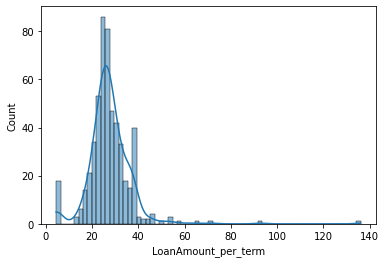

In [41]:
sns.histplot(df_final['LoanAmount_per_term'], kde=True)

### Normalization 

In [42]:
# normalize the data using Standard scalar

from sklearn.preprocessing import StandardScaler
scalar_ = StandardScaler()
df_final['ApplicantIncome'] = scalar_.fit_transform(df_final[['ApplicantIncome']])
df_final['CoapplicantIncome'] = scalar_.fit_transform(df_final[['CoapplicantIncome']])
df_final['LoanAmount'] = scalar_.fit_transform(df_final[['LoanAmount']])
df_final['Loan_Amount_Term'] = scalar_.fit_transform(df_final[['Loan_Amount_Term']])
df_final['LoanAmount_per_term'] = scalar_.fit_transform(df_final[['LoanAmount_per_term']])
df_final['RatioIncomeAmount_per_term'] = scalar_.fit_transform(df_final[['RatioIncomeAmount_per_term']])

In [43]:
df_final

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_per_term,RatioIncomeAmount_per_term
0,1,0,0.0,1,0,0.624796,-1.041395,0.022552,0.264422,1.0,2,1.0,-0.124608,0.050740
1,1,1,1.0,1,0,0.117229,0.439677,0.068913,0.264422,1.0,0,0.0,-0.092214,-0.107874
2,1,1,0.0,1,1,-0.629917,-1.041395,-1.039872,0.264422,1.0,2,1.0,-0.866963,0.032511
3,1,1,0.0,0,0,-0.858185,0.810632,-0.055971,0.264422,1.0,2,1.0,-0.179475,-0.356727
4,1,0,0.0,1,0,0.681496,-1.041395,0.263799,0.264422,1.0,2,1.0,0.043961,-0.007981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0,0,0.0,1,0,-0.683131,-1.041395,-0.934853,0.264422,1.0,0,NaN,-0.793582,-0.032467
89,1,1,4.0,1,0,-0.092007,-1.041395,-1.665404,-2.593269,1.0,0,NaN,-0.667734,0.110663
90,1,1,1.0,1,0,1.397372,-0.450540,1.665265,0.264422,1.0,2,NaN,1.023217,-0.169937
91,1,1,2.0,1,0,1.237609,-1.041395,0.889668,0.264422,1.0,2,NaN,0.481278,-0.036737


In [44]:
new_train = df_final.iloc[:521]
new_test = df_final.iloc[521:]

In [45]:
new_test.drop("Loan_Status",axis=1,inplace=True) 

In [46]:
new_test 

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_per_term,RatioIncomeAmount_per_term
83,0,1,1.0,1,0,1.997830,-1.041395,1.673454,0.264422,1.0,1,1.028939,-0.050756
84,1,1,0.0,0,0,-0.964164,1.309684,-3.190772,-2.593269,1.0,2,-2.175047,2.096084
85,1,1,1.0,1,0,-0.425451,0.865582,0.708264,0.264422,1.0,1,0.354525,-0.394922
86,1,1,2.0,0,0,-0.146076,0.391251,0.491705,0.264422,1.0,0,0.203207,-0.282705
87,1,1,0.0,1,0,-0.509777,0.642802,-0.251383,0.264422,1.0,0,-0.316016,-0.202891
88,0,0,0.0,1,0,-0.683131,-1.041395,-0.934853,0.264422,1.0,0,-0.793582,-0.032467
89,1,1,4.0,1,0,-0.092007,-1.041395,-1.665404,-2.593269,1.0,0,-0.667734,0.110663
90,1,1,1.0,1,0,1.397372,-0.450540,1.665265,0.264422,1.0,2,1.023217,-0.169937
91,1,1,2.0,1,0,1.237609,-1.041395,0.889668,0.264422,1.0,2,0.481278,-0.036737
92,0,0,0.0,1,1,0.117229,-1.041395,0.144991,0.264422,0.0,1,-0.039055,-0.128896


## Model Building

### Splitting the data 

In [47]:
X = new_train.drop('Loan_Status', axis = 1)
y = new_train['Loan_Status']

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [49]:
#finding best random_state
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(0,500):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    LR=LogisticRegression()
    LR.fit(X_train,y_train)
    pred=LR.predict(X_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on random_state ",maxRS)

Best accuracy is  0.8778625954198473  on random_state  267


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state = 267)

## Classification Algorithms

### Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr =  lr.predict(X_test)

In [52]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [53]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_lr))
print("Precision",metrics.precision_score(y_test,y_pred_lr))
print("Recall",metrics.recall_score(y_test,y_pred_lr))
print("f1_score",metrics.f1_score(y_test,y_pred_lr))

Accuracy: 0.8778625954198473
Precision 0.8623853211009175
Recall 0.9894736842105263
f1_score 0.9215686274509803


In [54]:
y_pred_lr =  lr.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_train, y_pred_lr))
print("Precision",metrics.precision_score(y_train,y_pred_lr))
print("Recall",metrics.recall_score(y_train,y_pred_lr))
print("f1_score",metrics.f1_score(y_train,y_pred_lr))

Accuracy: 0.7769230769230769
Precision 0.7682926829268293
Recall 0.9581749049429658
f1_score 0.8527918781725888


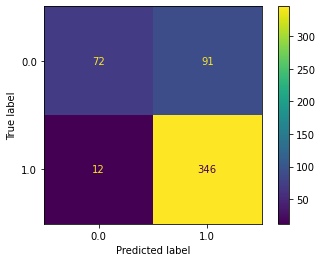

In [55]:
metrics.plot_confusion_matrix(lr,X,y)

### Decision tree 

In [56]:
# Building a Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

y_pred_tree=dtree.predict(X_test)

In [57]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))
print("Precision",metrics.precision_score(y_test,y_pred_tree))
print("Recall",metrics.recall_score(y_test,y_pred_tree))
print("f1_score",metrics.f1_score(y_test,y_pred_tree))

Accuracy: 0.6106870229007634
Precision 0.7972972972972973
Recall 0.6210526315789474
f1_score 0.6982248520710059


In [58]:
y_pred_tree=dtree.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_train, y_pred_tree))
print("Precision",metrics.precision_score(y_train,y_pred_tree))
print("Recall",metrics.recall_score(y_train,y_pred_tree))
print("f1_score",metrics.f1_score(y_train,y_pred_tree))

Accuracy: 1.0
Precision 1.0
Recall 1.0
f1_score 1.0


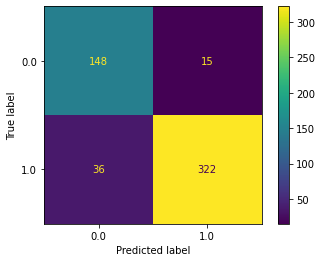

In [59]:
metrics.plot_confusion_matrix(dtree,X,y)

### Random Forest Classifier

In [60]:
# Building a Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

y_pred_rf=rf.predict(X_test)

In [61]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision",metrics.precision_score(y_test,y_pred_rf))
print("Recall",metrics.recall_score(y_test,y_pred_rf))
print("f1_score",metrics.f1_score(y_test,y_pred_rf))

Accuracy: 0.8091603053435115
Precision 0.8571428571428571
Recall 0.8842105263157894
f1_score 0.8704663212435233


In [62]:
y_pred_rf=rf.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_train, y_pred_rf))
print("Precision",metrics.precision_score(y_train,y_pred_rf))
print("Recall",metrics.recall_score(y_train,y_pred_rf))
print("f1_score",metrics.f1_score(y_train,y_pred_rf))

Accuracy: 1.0
Precision 1.0
Recall 1.0
f1_score 1.0


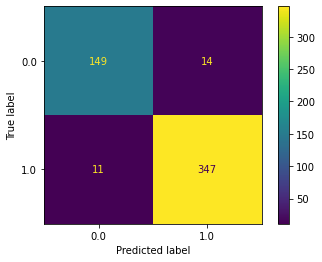

In [63]:
metrics.plot_confusion_matrix(rf,X,y)

### Gradient Boosting

In [64]:
# Building a Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier()
gbm.fit(X_train,y_train)

y_pred_gbm=gbm.predict(X_test)

In [65]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gbm))
print("Precision",metrics.precision_score(y_test,y_pred_gbm))
print("Recall",metrics.recall_score(y_test,y_pred_gbm))
print("f1_score",metrics.f1_score(y_test,y_pred_gbm))

Accuracy: 0.8549618320610687
Precision 0.8725490196078431
Recall 0.9368421052631579
f1_score 0.9035532994923857


In [66]:
y_pred_gbm=gbm.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_train, y_pred_gbm))
print("Precision",metrics.precision_score(y_train,y_pred_gbm))
print("Recall",metrics.recall_score(y_train,y_pred_gbm))
print("f1_score",metrics.f1_score(y_train,y_pred_gbm))

Accuracy: 0.9333333333333333
Precision 0.9128919860627178
Recall 0.9961977186311787
f1_score 0.9527272727272728


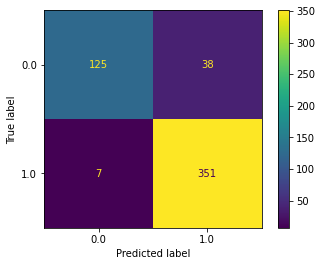

In [67]:
metrics.plot_confusion_matrix(gbm,X,y)

### Ada Boost Classifier 

In [68]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()
adb.fit(X_train, y_train)

y_pred_adb = adb.predict(X_test)

In [69]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_adb))
print("Precision",metrics.precision_score(y_test,y_pred_adb))
print("Recall",metrics.recall_score(y_test,y_pred_adb))
print("f1_score",metrics.f1_score(y_test,y_pred_adb))

Accuracy: 0.8396946564885496
Precision 0.8627450980392157
Recall 0.9263157894736842
f1_score 0.8934010152284264


In [70]:
y_pred_adb = adb.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_train, y_pred_adb))
print("Precision",metrics.precision_score(y_train,y_pred_adb))
print("Recall",metrics.recall_score(y_train,y_pred_adb))
print("f1_score",metrics.f1_score(y_train,y_pred_adb))

Accuracy: 0.8282051282051283
Precision 0.8266666666666667
Recall 0.9429657794676806
f1_score 0.8809946714031971


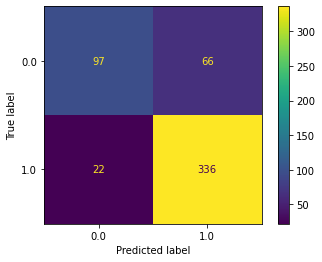

In [71]:
metrics.plot_confusion_matrix(adb,X,y)

### Support Vector Machine

In [72]:
from sklearn.svm import SVC
svc= SVC()
svc.fit(X_train, y_train)

y_pred_svc = svc.predict(X_test)

In [73]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svc))
print("Precision",metrics.precision_score(y_test,y_pred_svc))
print("Recall",metrics.recall_score(y_test,y_pred_svc))
print("f1_score",metrics.f1_score(y_test,y_pred_svc))

Accuracy: 0.8549618320610687
Precision 0.8333333333333334
Recall 1.0
f1_score 0.9090909090909091


In [74]:
y_pred_svc = svc.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_train, y_pred_svc))
print("Precision",metrics.precision_score(y_train,y_pred_svc))
print("Recall",metrics.recall_score(y_train,y_pred_svc))
print("f1_score",metrics.f1_score(y_train,y_pred_svc))

Accuracy: 0.7974358974358975
Precision 0.7754491017964071
Recall 0.9847908745247148
f1_score 0.8676716917922946


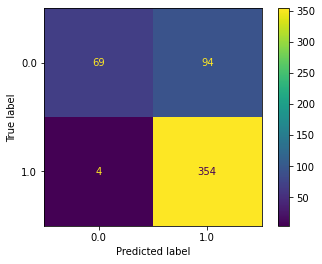

In [75]:
metrics.plot_confusion_matrix(svc,X,y)

### K Nearest Neighbour Classifier

In [76]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 7)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

In [77]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_knn))
print("Precision",metrics.precision_score(y_test,y_pred_knn))
print("Recall",metrics.recall_score(y_test,y_pred_knn))
print("f1_score",metrics.f1_score(y_test,y_pred_knn))

Accuracy: 0.7022900763358778
Precision 0.7641509433962265
Recall 0.8526315789473684
f1_score 0.8059701492537313


In [78]:
y_pred_knn = knn.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_train, y_pred_knn))
print("Precision",metrics.precision_score(y_train,y_pred_knn))
print("Recall",metrics.recall_score(y_train,y_pred_knn))
print("f1_score",metrics.f1_score(y_train,y_pred_knn))

Accuracy: 0.7512820512820513
Precision 0.7515151515151515
Recall 0.9429657794676806
f1_score 0.8364249578414839


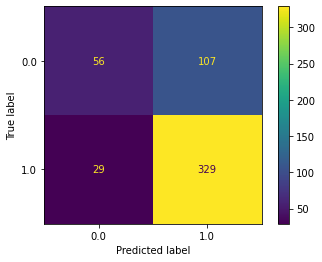

In [79]:
metrics.plot_confusion_matrix(knn,X,y)

### Naive Bayes

In [80]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred_gnb = gnb.predict(X_test)

In [81]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gnb))
print("Precision",metrics.precision_score(y_test,y_pred_gnb))
print("Recall",metrics.recall_score(y_test,y_pred_gnb))
print("f1_score",metrics.f1_score(y_test,y_pred_gnb))

Accuracy: 0.8625954198473282
Precision 0.8666666666666667
Recall 0.9578947368421052
f1_score 0.91


In [82]:
y_pred_gnb = gnb.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_train, y_pred_gnb))
print("Precision",metrics.precision_score(y_train,y_pred_gnb))
print("Recall",metrics.recall_score(y_train,y_pred_gnb))
print("f1_score",metrics.f1_score(y_train,y_pred_gnb))

Accuracy: 0.7717948717948718
Precision 0.7652439024390244
Recall 0.9543726235741445
f1_score 0.8494077834179358


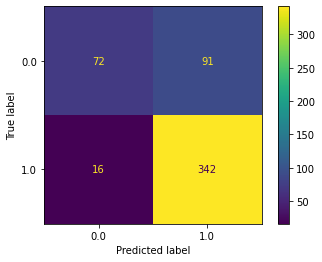

In [83]:
metrics.plot_confusion_matrix(gnb,X,y)

### Result

1. Accuracy of Logistic Regression :- 87.78 %
2. Accuracy of Decision Tree :-62.59  %
3. Accuracy of Random Forest Classifier :- 83.96 %
4. Accuracy of Gradient Boosting :- 83.96 %
5. Accuracy of Ada Boost Classifier :- 83.96 %
6. Accuracy of Support Vector Machine :- 85.49 %
7. Accuracy of K Nearest Neighbors Classifier :- 69.46 %
8. Accuracy of Naive Bayes :- 86.25 %

### Observation

1. For every model, we have train the data (x_train, y_train) & predict with the help of x_test. Now, with the help of the y_test & prediction value, we got the accuracy score. So, out of all models, we are getting the highest accuracy of 87.78% for algorithm ( Logistic Regression) with less type-I&II error.
2. If we observe training accuracies ,some models like Decision Trees, Random Forest Classifier & Gradient Boosting are overfitted. So, hyperparameter tuning needed to be done.

### Cross Validation

We would perform cross-validation for every model & compare with the accuracy score, whichever model gives the less difference between cross-validation score & accuracy score is the best fit model.

In [84]:
from sklearn.model_selection import cross_val_score
for j in range(2,16):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean = cv_score.mean()
print ("Cross validation score for Logistic Regression",cv_mean*100) 

Cross validation score for Logistic Regression 68.71708683473389


In [85]:
for j in range(2,16):
    cv_score=cross_val_score(dtree,x,y,cv=j)
    cv_mean = cv_score.mean()
print ("Cross validation score for Decission Tree",cv_mean*100) 

Cross validation score for Decission Tree 70.84593837535013


In [86]:
for j in range(2,16):
    cv_score=cross_val_score(rf,x,y,cv=j)
    cv_mean = cv_score.mean()
print ("Cross validation score for Random Forest Classifier",cv_mean*100) 

Cross validation score for Random Forest Classifier 77.34453781512605


In [87]:
for j in range(2,16):
    cv_score=cross_val_score(gbm,x,y,cv=j)
    cv_mean = cv_score.mean()
print ("Cross validation score for Gradient Boosting",cv_mean*100) 

Cross validation score for Gradient Boosting 75.6358543417367


In [88]:
for j in range(2,16):
    cv_score=cross_val_score(adb,x,y,cv=j)
    cv_mean = cv_score.mean()
print ("Cross validation score for Ada Boosting Classifier",cv_mean*100) 

Cross validation score for Ada Boosting Classifier 78.52100840336135


In [89]:
for j in range(2,16):
    cv_score=cross_val_score(svc,x,y,cv=j)
    cv_mean = cv_score.mean()
print ("Cross validation score for Support vector machine",cv_mean*100) 

Cross validation score for Support vector machine 68.71708683473389


In [90]:
for j in range(2,16):
    cv_score=cross_val_score(knn,x,y,cv=j)
    cv_mean = cv_score.mean()
print ("Cross validation score for K Nearest Neighbour",cv_mean*100) 

Cross validation score for K Nearest Neighbour 63.120448179271705


In [91]:
for j in range(2,16):
    cv_score=cross_val_score(gnb,x,y,cv=j)
    cv_mean = cv_score.mean()
print ("Cross validation score for Naive Bayes",cv_mean*100) 

Cross validation score for Naive Bayes 66.60504201680672


### Hyper Parameter Tuning 

In [92]:
#hyper parameter tuning for Dession tree

In [93]:
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3, 5, 6, 7], 'criterion':['gini','entrophy'],'min_samples_split': [50, 100, 150, 200, 250] }
tree_grid = GridSearchCV(dtree, cv = 10, param_grid=param_dist,n_jobs = 3)
tree_grid.fit(X_train,y_train) 
print('Best Parameters using grid search: \n', tree_grid.best_params_)

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 100}


In [94]:
dtree= DecisionTreeClassifier(criterion='gini',random_state=267,max_depth=3,min_samples_split=100)
dtree.fit(X_train,y_train)

y_pred_dtree=dtree.predict(X_test)

In [95]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dtree))
print("Precision",metrics.precision_score(y_test,y_pred_dtree))
print("Recall",metrics.recall_score(y_test,y_pred_dtree))
print("f1_score",metrics.f1_score(y_test,y_pred_dtree))

Accuracy: 0.8854961832061069
Precision 0.8636363636363636
Recall 1.0
f1_score 0.9268292682926829


In [96]:
y_pred_tree=dtree.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_train, y_pred_tree))
print("Precision",metrics.precision_score(y_train,y_pred_tree))
print("Recall",metrics.recall_score(y_train,y_pred_tree))
print("f1_score",metrics.f1_score(y_train,y_pred_tree))

Accuracy: 0.7769230769230769
Precision 0.7603550295857988
Recall 0.9771863117870723
f1_score 0.8552412645590682


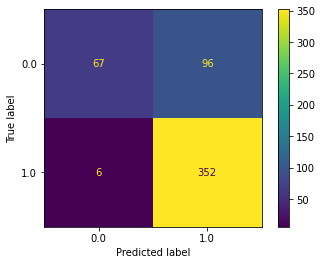

In [97]:
metrics.plot_confusion_matrix(dtree,X,y)

In [98]:
for j in range(2,16):
    cv_score=cross_val_score(dtree,x,y,cv=j)
    cv_mean = cv_score.mean()
print ("Cross validation score for Decission Tree",cv_mean*100) 

Cross validation score for Decission Tree 80.25770308123249


In [99]:
#hyperparameter tuning for Random forest classifier

In [100]:

from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [ 3,5, 6, 7], 'criterion':['gini','entrophy'],'min_samples_split': [50, 100, 150, 200, 250] }
rf_grid = GridSearchCV(rf, cv = 5, param_grid=param_dist,n_jobs = 3)
rf_grid.fit(X_train,y_train) 
print('Best Parameters using grid search: \n', rf_grid.best_params_)

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 100}


In [101]:
rf= RandomForestClassifier(criterion='gini',random_state=267,max_depth=3,min_samples_split=50)
rf.fit(X_train,y_train)

y_pred_rf=rf.predict(X_test)

In [102]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision",metrics.precision_score(y_test,y_pred_rf))
print("Recall",metrics.recall_score(y_test,y_pred_rf))
print("f1_score",metrics.f1_score(y_test,y_pred_rf))

Accuracy: 0.8854961832061069
Precision 0.8636363636363636
Recall 1.0
f1_score 0.9268292682926829


In [103]:
y_pred_rf=rf.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_train, y_pred_rf))
print("Precision",metrics.precision_score(y_train,y_pred_rf))
print("Recall",metrics.recall_score(y_train,y_pred_rf))
print("f1_score",metrics.f1_score(y_train,y_pred_rf))

Accuracy: 0.7769230769230769
Precision 0.7603550295857988
Recall 0.9771863117870723
f1_score 0.8552412645590682


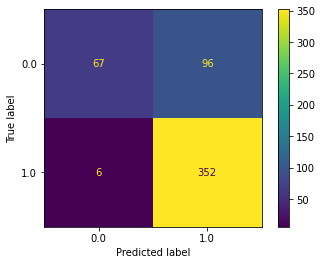

In [104]:
metrics.plot_confusion_matrix(rf,X,y)

In [105]:
for j in range(2,16):
    cv_score=cross_val_score(rf,x,y,cv=j)
    cv_mean = cv_score.mean()
print ("Cross validation score for Random Forest Classifier",cv_mean*100) 

Cross validation score for Random Forest Classifier 80.25770308123249


In [106]:
#hyperparameter tuning for Gradient Boosting

In [107]:
from sklearn.model_selection import GridSearchCV
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}
cv = GridSearchCV(gbm,parameters,cv=5)
cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [5, 50, 250, 500]})

In [108]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [109]:
display(cv)

Best parameters are: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}


0.674 + or -0.006 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.756 + or -0.041 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.756 + or -0.045 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.736 + or -0.052 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.674 + or -0.006 for the {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.741 + or -0.042 for the {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.71 + or -0.055 for the {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.7 + or -0.063 for the {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}
0.674 + or -0.006 for the {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 5}
0.721 + or -0.06 for the {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 50}
0.723 + or -0.057 for the {'learning_rate': 0.01, 'max_depth

In [110]:
# Building a Gradient Boosting Model again 
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(learning_rate= 0.01, max_depth= 3, n_estimators= 250)
gbm.fit(X_train,y_train)

y_pred_gbm=gbm.predict(X_test)

In [111]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gbm))
print("Precision",metrics.precision_score(y_test,y_pred_gbm))
print("Recall",metrics.recall_score(y_test,y_pred_gbm))
print("f1_score",metrics.f1_score(y_test,y_pred_gbm))

Accuracy: 0.8702290076335878
Precision 0.8545454545454545
Recall 0.9894736842105263
f1_score 0.9170731707317074


In [112]:
y_pred_gbm=gbm.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_train, y_pred_gbm))
print("Precision",metrics.precision_score(y_train,y_pred_gbm))
print("Recall",metrics.recall_score(y_train,y_pred_gbm))
print("f1_score",metrics.f1_score(y_train,y_pred_gbm))

Accuracy: 0.8
Precision 0.7728613569321534
Recall 0.9961977186311787
f1_score 0.8704318936877077


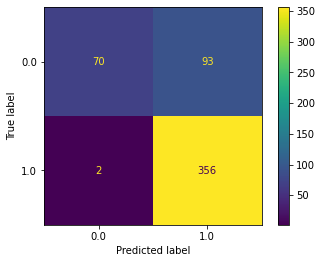

In [113]:
metrics.plot_confusion_matrix(gbm,X,y)

In [114]:
for j in range(2,16):
    cv_score=cross_val_score(gbm,x,y,cv=j)
    cv_mean = cv_score.mean()
print ("Cross validation score for Gradient Boosting",cv_mean*100) 

Cross validation score for Gradient Boosting 79.2997198879552


Analysis after hyperparameter tuning

1. Accuracy and cross validation for Decision tree are 88.54 & 80.25
2. Accuracy and cross validation for Random forest classifier are 88.54 & 80.25
3. Accuracy and cross validation for Gradient Boosting are 87.02 & 79.29

1. Here we can see, difference between accuracy and cross validation score is high for Logistic Regression 
and SVM & Naive Bayes as compare to other models.
2. Ada Boost classifier has the least difference between cross-validation score & accuracy score.


### ROC-AUC 

Now, let’s check AUC-ROC & accordingly we would be able to decide the best fit model

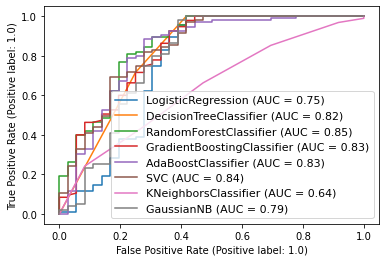

In [115]:
from sklearn.metrics import roc_curve, roc_auc_score,plot_roc_curve

disp = plot_roc_curve(lr,X_test,y_test)
disp = plot_roc_curve(dtree,X_test,y_test,ax = disp.ax_)
disp = plot_roc_curve(rf,X_test,y_test,ax = disp.ax_)
disp = plot_roc_curve(gbm,X_test,y_test,ax = disp.ax_)
disp = plot_roc_curve(adb,X_test,y_test,ax = disp.ax_)
disp = plot_roc_curve(svc,X_test,y_test,ax = disp.ax_)
disp = plot_roc_curve(knn,X_test,y_test,ax = disp.ax_)
disp = plot_roc_curve(gnb,X_test,y_test,ax = disp.ax_)

plt.legend(prop = {'size':11}, loc = 'lower right')
plt.show()

1. Decission Tree Classifier has low AUC Value, therfore this algorithm is not recomendded.
2. Based on the Accuracy , diffference between Accuracy and cross validation score ,Confusion matrix(Type I & II error), AUC & classification report ( Precision, Recall & F1 Score) Random Forest classifier algorithm is recommended

### Predicting on Test data

In [116]:
#using logistic regression
predict_test = lr.predict(new_test)
test_df = pd.DataFrame (data=predict_test , columns =['Loan_Status'])
test_df['Loan_Status']= test_df['Loan_Status'].map({1:'Y',0:'N'}) 

In [117]:
test_df

<bound method NDFrame.tail of   Loan_Status
0           Y
1           Y
2           Y
3           Y
4           Y
5           Y
6           Y
7           Y
8           Y
9           N>

In [118]:
#using random forest classifier
predict_test = rf.predict(new_test)
test_df = pd.DataFrame (data=predict_test , columns =['Loan_Status'])
test_df['Loan_Status']= test_df['Loan_Status'].map({1:'Y',0:'N'}) 
test_df

<bound method NDFrame.tail of   Loan_Status
0           Y
1           Y
2           Y
3           Y
4           Y
5           Y
6           Y
7           Y
8           Y
9           N>

In [119]:
#using Ada boosting 
predict_test = adb.predict(new_test)
test_df = pd.DataFrame (data=predict_test , columns =['Loan_Status'])
test_df['Loan_Status']= test_df['Loan_Status'].map({1:'Y',0:'N'})
test_df

<bound method NDFrame.tail of   Loan_Status
0           Y
1           Y
2           Y
3           Y
4           Y
5           Y
6           Y
7           Y
8           Y
9           N>

### Conclusion

In this project, machine learning approach to study bank credit dataset in order to predict customers credit worthiness their ability to pay their loan. We employed different machine learning algorithms on the dataset in order to determine which algorithms are the best fit for studying bank credit dataset
1. Logistic Regression works good for our project having accuracy of 87.78% considering lower type-I & II error when compared to other models.
2. Ada Boost Classifier with accuracy 83.96 % is also working good considering low false positives when compared to the other models.
3. Whereas, Random forest Classifier is giving accuracy of 88.54% but with high type-I & II errors when compared to other models.

### Recommendations for Bank

1. Logistic Regression is recommended for our project having accuracy of 87.78% considering lower type-I & II errors.
2. Creating features like LoanAmount_per_term & RatioIncome_per_term helped in increasing the accuracy of the models.
3. We would need more data to make the models perform better.
4. As we have seen, the prediction is showing a similar relationship with the actual loan status from the train data set, which means the model predicted correctly & this could help banks to save time & predict which all customers could get the approval based on these features.